# DS-SF-30 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import statsmodels.formula.api as smf

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [5]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [8]:
df

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
...,...,...,...,...
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [14]:

df.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400 observations

> ### Question 2.  Create a summary table.

In [15]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


In [41]:
df['admit'].sum() #total should equal all admitted

126

In [42]:
df['admit'].mean()

0.31738035264483627

In [43]:
df['admit'].count()

397

> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

Answer: One possibility is that gre is not as much of a factor in admissions

> ### Question 4.  Drop data points with missing data.

In [17]:
df.isnull()

,admit,gre,gpa,prestige
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
395,False,False,False,False
396,False,False,False,False
397,False,False,False,False
398,False,False,False,False


In [18]:
df.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [21]:
df = df.dropna()

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [23]:
df.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

Answer:

> ### Question 6.  Create boxplots for `gre` and `gpa`.

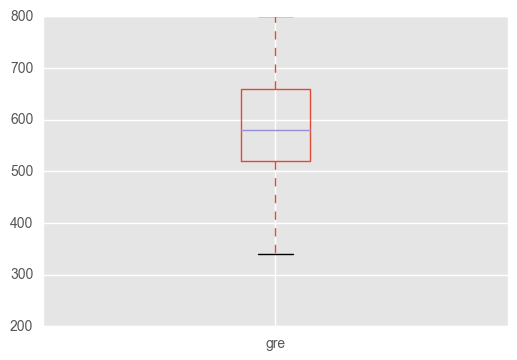

In [24]:
df.gre.plot(kind='box')

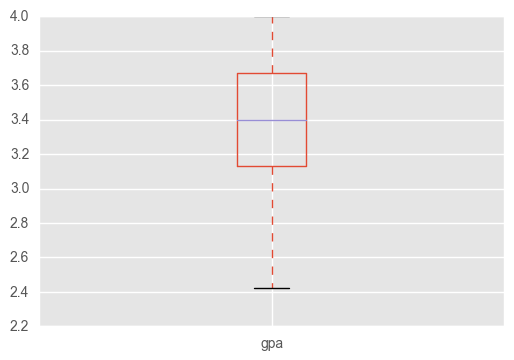

In [25]:
df.gpa.plot(kind='box')

> ### Question 7.  What do boxplots show?

Answer: with GPA, the mean is much closer to the max - additional the IQR is closer to the max. In terms of gre the mean is much closer to the median. 

> ### Question 8.  Plot the distribution of each variable.

In [30]:
df.admit.order().values

/Users/samuelleichman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [31]:
df.gre.order().values

/Users/samuelleichman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


array([ 220.,  300.,  300.,  300.,  340.,  340.,  340.,  340.,  360.,
        360.,  360.,  360.,  380.,  380.,  380.,  380.,  380.,  380.,
        380.,  380.,  400.,  400.,  400.,  400.,  400.,  400.,  400.,
        400.,  400.,  400.,  400.,  420.,  420.,  420.,  420.,  420.,
        420.,  420.,  440.,  440.,  440.,  440.,  440.,  440.,  440.,
        440.,  440.,  440.,  460.,  460.,  460.,  460.,  460.,  460.,
        460.,  460.,  460.,  460.,  460.,  460.,  460.,  480.,  480.,
        480.,  480.,  480.,  480.,  480.,  480.,  480.,  480.,  480.,
        480.,  480.,  480.,  480.,  480.,  500.,  500.,  500.,  500.,
        500.,  500.,  500.,  500.,  500.,  500.,  500.,  500.,  500.,
        500.,  500.,  500.,  500.,  500.,  500.,  500.,  500.,  520.,
        520.,  520.,  520.,  520.,  520.,  520.,  520.,  520.,  520.,
        520.,  520.,  520.,  520.,  520.,  520.,  520.,  520.,  520.,
        520.,  520.,  520.,  520.,  520.,  540.,  540.,  540.,  540.,
        540.,  540.,

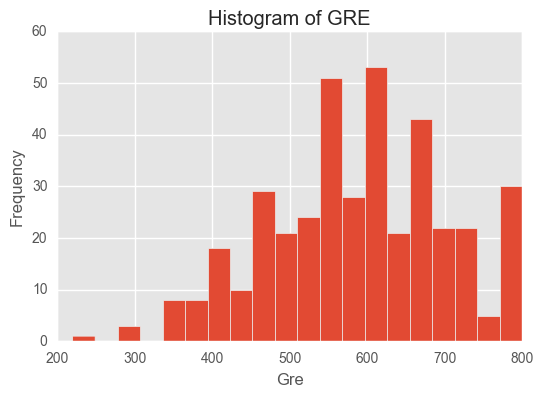

In [36]:
# add title and labels
df.gre.plot(kind='hist', bins=20, title='Histogram of GRE')
plt.xlabel('Gre')
plt.ylabel('Frequency')

In [32]:
df.gpa.order().values

/Users/samuelleichman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


array([ 2.26,  2.42,  2.42,  2.48,  2.52,  2.55,  2.56,  2.62,  2.62,
        2.63,  2.65,  2.67,  2.67,  2.68,  2.69,  2.7 ,  2.7 ,  2.71,
        2.71,  2.73,  2.76,  2.78,  2.78,  2.79,  2.79,  2.81,  2.81,
        2.81,  2.82,  2.82,  2.83,  2.84,  2.85,  2.85,  2.86,  2.86,
        2.88,  2.9 ,  2.9 ,  2.9 ,  2.9 ,  2.91,  2.91,  2.91,  2.92,
        2.92,  2.93,  2.93,  2.93,  2.93,  2.93,  2.94,  2.94,  2.94,
        2.95,  2.96,  2.96,  2.97,  2.97,  2.98,  2.98,  2.98,  2.98,
        2.98,  2.98,  3.  ,  3.  ,  3.  ,  3.  ,  3.01,  3.01,  3.02,
        3.02,  3.02,  3.02,  3.03,  3.04,  3.04,  3.05,  3.05,  3.05,
        3.06,  3.07,  3.07,  3.07,  3.07,  3.08,  3.08,  3.08,  3.08,
        3.09,  3.1 ,  3.11,  3.12,  3.12,  3.12,  3.12,  3.13,  3.13,
        3.13,  3.13,  3.13,  3.14,  3.14,  3.14,  3.14,  3.15,  3.15,
        3.15,  3.15,  3.15,  3.15,  3.15,  3.16,  3.16,  3.17,  3.17,
        3.17,  3.17,  3.17,  3.18,  3.19,  3.19,  3.19,  3.19,  3.19,
        3.2 ,  3.2 ,

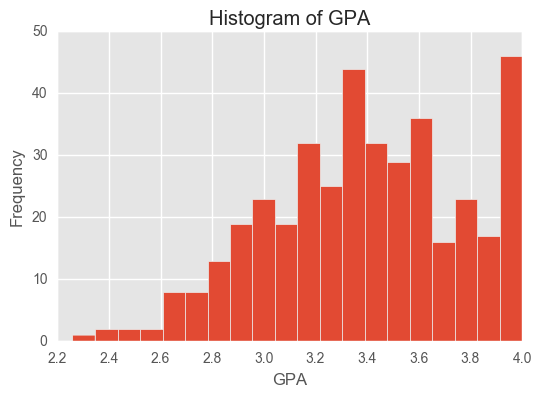

In [37]:
# add title and labels
df.gpa.plot(kind='hist', bins=20, title='Histogram of GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')

In [33]:
df.prestige.order().values

/Users/samuelleichman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

In [ ]:
# TODO

In [ ]:
# TODO

Answer: Per the histograms above, there does not appear to be a normal distribution for gre and gpa as the majority of occurances are at the higher end of the range. Not sure the purpose to correct their distrubutions... 

> ### Question 10.  Create a correlation matrix for the dataset

In [34]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: Prestige had the highest (albeit negative) correlation to admit; gre and gpa could be coliniear. 

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: Establish a correlation between admit and prestige by determining significance (prestige is significant) and model fit (R Squared does not suggest a great fit). 

In [40]:
import statsmodels.formula.api as smf

def Xy(df):
    X = df[ ['prestige'] ] # X is a DataFrame

    y = df.admit # y is a Series

    return X, y

X, y = Xy(df)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     103.5
Date:                Thu, 19 Jan 2017   Prob (F-statistic):           9.61e-22
Time:                        15:47:58   Log-Likelihood:                -289.44
No. Observations:                 397   AIC:                             580.9
Df Residuals:                     396   BIC:                             584.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
prestige       0.0963      0.009     10.171      0.000         0.078     0.115
==============================================================================
Omnibus:                      584.865   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.026
Skew:                           0.747   Prob(JB):                     7.58e-15
Kurtosis:                       1.697   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### Question 13.  What is your hypothesis?

Answer: Prestige score is a good indicator of whether a student will be admitted to school. 